# Multilayer Perceptrion (MLP)

- Classical ML example.
- Use hidden-layers network to recognize numbers from images.

Based on Marie Burle's course \\
[Outline](https://wgschool.netlify.app/mlremake/) \\
[Slides](https://westgrid-slides.netlify.app/pt_firstnn.html#/) \\

<div>
<img src=https://i.stack.imgur.com/xODHX.png width="500"/>
</div>

Each connection between layers represents a linear transformations of the form: \\
$T: \mathbf{y} = \mathbf{W}\mathbf{x}+\mathbf{b}$ \\




# Google Colab 
Suggested tool. \\
Ready to work, no instalation, no extra work, notebook.



# MNIST dataset

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) \\
Source: https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png \\

Greyscale 28x28 pixels (values from 0 to 255) <br>
60,000 training pairs, labeled from 0 to 9 <br>
10,000 testing pairs 

Several preprocessing steps
 - Centering images
 - normalizing amplitudes

# Creating a one hidden-layer Neural Network (NN)
Aka MLP

In [1]:
# Importing libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt


## Comments

Contains several well-known datasets, as MNIST. <br>
Useful for examples and tests.

<code> torch.nn </code> ONLY works with batches.

Thus, we use <code> torch.utils.data.DataLoader </code> to extract those batches from the datasets.




In [2]:
# Loading and transforming the data into Pytorch tensors
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
# According to M. H. Burle, the mean and standard deviation of the MNIST training data are 0.1307 and 0.3081 respectively, hence these values

train_data = datasets.MNIST('',train=True, download=True, transform=transform)
test_data = datasets.MNIST('',train=False, download=True, transform=transform)

print(f"train_data elements: {len(train_data)}")
print(f"test_data elements: {len(test_data)}")

train_data elements: 60000
test_data elements: 10000


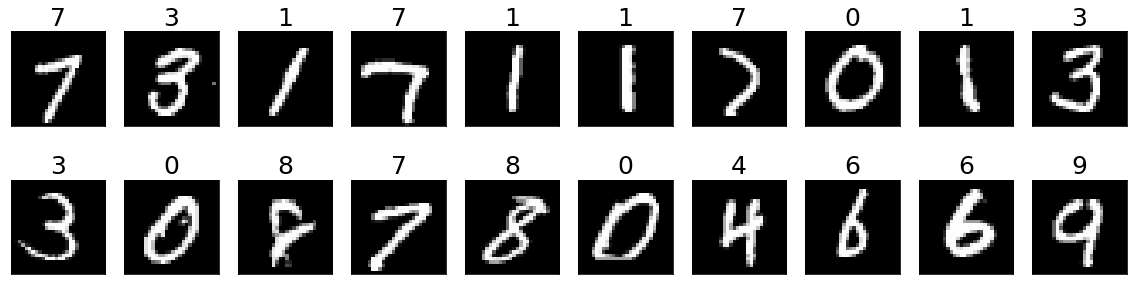

In [3]:
# DataLoaders

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, shuffle=True)
dataiter = iter(train_loader)
batchimg, batchlabel = dataiter.next()

batchplot = plt.figure(figsize=(20, 5))
for i in torch.arange(20):
    sub = batchplot.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    aux = sub.imshow(torch.squeeze(batchimg[i]), cmap='gray')
    sub.set_title(str(batchlabel[i].item()), fontsize=25)

<code> torch.utils.data.DataLoader </code> extracts a batch from the 60,000 training pairs or the 10,000 training ones <br>
<code> iter() </code> creates an iterable object from the batch <br> 
<code> dataiter.next() </code> extracts the images and labels in different tensors<br>

We can also check the range of values of each image

In [4]:
for i in torch.arange(20):
  a = torch.min(batchimg[i])
  b = torch.max(batchimg[i])
  print(i,"\t",a.item(),"\t",b.item())

L1 = torch.min(batchimg[0])
L2 = torch.max(batchimg[0])

tensor(0) 	 -0.4242129623889923 	 2.821486711502075
tensor(1) 	 -0.4242129623889923 	 2.808758497238159
tensor(2) 	 -0.4242129623889923 	 2.821486711502075
tensor(3) 	 -0.4242129623889923 	 2.821486711502075
tensor(4) 	 -0.4242129623889923 	 2.808758497238159
tensor(5) 	 -0.4242129623889923 	 2.821486711502075
tensor(6) 	 -0.4242129623889923 	 2.821486711502075
tensor(7) 	 -0.4242129623889923 	 2.821486711502075
tensor(8) 	 -0.4242129623889923 	 2.821486711502075
tensor(9) 	 -0.4242129623889923 	 2.821486711502075
tensor(10) 	 -0.4242129623889923 	 2.808758497238159
tensor(11) 	 -0.4242129623889923 	 2.821486711502075
tensor(12) 	 -0.4242129623889923 	 2.821486711502075
tensor(13) 	 -0.4242129623889923 	 2.808758497238159
tensor(14) 	 -0.4242129623889923 	 2.821486711502075
tensor(15) 	 -0.4242129623889923 	 2.821486711502075
tensor(16) 	 -0.4242129623889923 	 2.821486711502075
tensor(17) 	 -0.4242129623889923 	 2.821486711502075
tensor(18) 	 -0.4242129623889923 	 2.821486711502075
ten

## Defining the NN structure

1 hidden layers <br>
Two transformations <br>

<div>
<img src=https://drive.google.com/uc?export=view&id=1bjzN-nEp0Jcx5vdyRVozLlmDXwptWd4p width="500"/>
</div>

784 pixels $\xrightarrow{T_1}$ 128 neurons $\xrightarrow{T_2}$ 10 neurons.


The class <code> torch.nn.Module </code> is the "Base class for all neural network modules"


In [5]:
# This is how we defin the network architecture

class Net(nn.Module): 
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(784,128) # fully connected
    self.fc2 = nn.Linear(128,10) # 128 is arbitrary
  def forward(self, x):
    x = torch.flatten(x,1) #transforms a square, cube, etc into a line
    x = self.fc1(x) # 1st LT
    x = F.relu(x)   # activation function
    x = self.fc2(x) # 2nd LT
    output = F.log_softmax(x, dim=1) #activation function
    return output

class Net2(nn.Module): 
  def __init__(self):
    super(Net2, self).__init__()
    self.fc1 = nn.Linear(784,128) # fully connected
    self.fc2 = nn.Linear(128,128) # 128 is arbitrary
    self.fc3 = nn.Linear(128,10) # 128 is arbitrary
  def forward(self, x):
    x = torch.flatten(x,1) #transforms a square, cube, etc into a line
    x = self.fc1(x) # 1st LT
    x = F.relu(x)   # activation function
    x = self.fc2(x)
    x = F.relu(x)  
    x = self.fc2(x) # 3rd LT
    output = F.log_softmax(x, dim=1) #activation function
    return output

model = Net()
model2 = Net()
model3 = Net2()

<code> model </code> contains the net. 
It will be trained through the iterations, and we can evaluate an image by writing <br>
<code> output = model(tensor_variable) </code>

## Auxiliary functions

We will define the training and testing processes as functions so we can call them iteratively.

<code> model.train()</code> and <code> model.eval()</code> set the module in training or evaluation modes respectively. 

In [6]:
# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
# Testing function 
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


# Training and testing the network

In [7]:
epochs = 10
torch.manual_seed(1)
device = torch.device('cpu')

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000)

In [8]:
model = Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316140
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.570680
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.327127
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.932730
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.902604
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.720650
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.480207
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.725107
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.964267
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.595859

Test set: Average loss: 1.7456, Accuracy: 3395/10000 (34%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.543003
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.838990
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.490138
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.294611
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.568705
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.514002
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.315111
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.287663
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.899956
T

In [9]:
model2 = Net().to(device)

optimizer = optim.Adadelta(model2.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

for epoch in range(1, epochs + 1):
    train(model2, device, train_loader, optimizer, epoch)
    test(model2, device, test_loader)
    scheduler.step()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.358223
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.274702
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.207276
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.209605
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.105831
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.264958
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.131132
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.242458
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.121660
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.206714

Test set: Average loss: 0.1201, Accuracy: 9637/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.055755
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.149057
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.081448
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.097550
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.069205
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.145014
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.047030
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.124022
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.122287
T

In [10]:
model3 = Net2().to(device)

optimizer = optim.Adadelta(model3.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

for epoch in range(1, epochs + 1):
    train(model3, device, train_loader, optimizer, epoch)
    test(model3, device, test_loader)
    scheduler.step()

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.884266
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.235587
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.257989
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.284904
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.125144
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.274446
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.185356
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.234766
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.169616
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.175034

Test set: Average loss: 0.1245, Accuracy: 9628/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.075707
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.159817
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.074471
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.128298
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.052415
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.088250
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.081520
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.164950
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.144246
T

# Using the trained NNs

Now that we have a couple of trained NNs (we found the minimum of $\mathbf{W}$ for each transformation), we can proceed to test it with single images and observe if it labels the images correctly.

We will first try it with an image form the test data set, and then with images generated by ourselves in paint.

## Single image from test data

In [11]:
# We proceed to extract a single image from the test data set
SingleImg = torch.utils.data.DataLoader(test_data, batch_size=1,shuffle=True) #Pytorch only works with batches, so we need a batch of one element
dataiter = iter(SingleImg) #iterate over the elements of the batch
img1, label1 = dataiter.next() #extract the image and label in different tensors

print(type(img1))
print(img1.shape)
print()
print(type(label1))
print(label1.shape)

<class 'torch.Tensor'>
torch.Size([1, 1, 28, 28])

<class 'torch.Tensor'>
torch.Size([1])


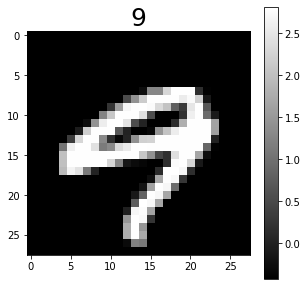

In [12]:
plt.figure(figsize=(5, 5))
plt.imshow(torch.squeeze(img1[0]), cmap='gray')
plt.title(str(label1[0].item()), fontsize=25)
plt.colorbar()

In [13]:
out = model(img1)
pred = out.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
print(pred)

out = model2(img1)
pred = out.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
print(pred)

tensor([[9]])
tensor([[9]])


## Several images from test data

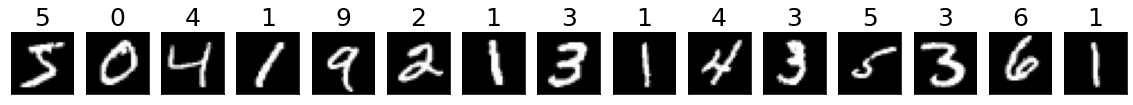

In [14]:
bs = 15
SevImg = torch.utils.data.DataLoader(test_data, batch_size=bs, shuffle=True)
dataiter = iter(train_loader)
batchimg, batchlabel = dataiter.next()

batchplot = plt.figure(figsize=(20, 5))
for i in torch.arange(bs):
    sub = batchplot.add_subplot(1, bs, i+1, xticks=[], yticks=[])
    sub.imshow(torch.squeeze(batchimg[i]), cmap='gray')
    sub.set_title(str(batchlabel[i].item()), fontsize=25)

In [15]:
print("Label","\t","NN_1","\t","NN_2")
for i in range(bs):
  out1 = model(batchimg[i])
  pred1 = out1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
  
  out2 = model2(batchimg[i])
  pred2 = out2.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

  #print("Label: ",batchlabel[i].item()," NN_1: ",torch.squeeze(pred1).item(), " NN_2: ", torch.squeeze(pred2).item())
  print(batchlabel[i].item(),"\t",torch.squeeze(pred1).item(),"\t",torch.squeeze(pred2).item())

Label 	 NN_1 	 NN_2
5 	 5 	 5
0 	 0 	 0
4 	 4 	 4
1 	 1 	 1
9 	 9 	 9
2 	 2 	 2
1 	 1 	 1
3 	 3 	 3
1 	 1 	 1
4 	 4 	 4
3 	 3 	 3
5 	 5 	 5
3 	 3 	 3
6 	 6 	 6
1 	 1 	 1


## User generated images

I created 10 images in paint with the goal to test the trained NN.


In [16]:
# To upload files on Google Colab
# from google.colab import files
# uploaded = files.upload()

### Single image



torch.Size([28, 28])
torch.Size([1, 1, 28, 28])

min:  0.0
max:  1.0

min:  -0.4242129623889923
max:  2.821486681699753


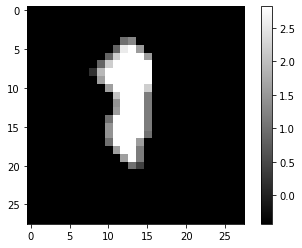

In [17]:
from PIL import Image
from numpy import asarray

image = Image.open('1.png')
data = asarray(image)*1.0 #conversion to float array
data = torch.from_numpy(data[:,:,0])/255 #Normalizing to [0,1s]

#Changing size from [28,28] to [1,1,28,28]
#This is necessary because torch.nn only works with batches
#Thus we fake the size of the array
print(data.size())
data = data.unsqueeze(0)
data = data.unsqueeze(0)
print(data.size())
print()

print("min: ",torch.min(data).item())
print("max: ",torch.max(data).item())

data = data/torch.max(data).item()
data = data*(L2-L1)+L1

print()
print("min: ",torch.min(data).item())
print("max: ",torch.max(data).item())

plt.imshow(torch.squeeze(data),cmap='gray')
plt.colorbar()

Double check on the dimensions of the array

In [18]:
print(img1.size())
print(data.size())
print(type(img1))
print(type(data))

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [19]:
data = data.float() 

out3 = model(data)
pred3 = out3.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
print("NN_1 prediction: ",torch.squeeze(pred3).item())

out3 = model2(data)
pred3 = out3.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
print("NN_2 prediction: ",torch.squeeze(pred3).item())

out3 = model3(data)
pred3 = out3.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
print("NN_3 prediction: ",torch.squeeze(pred3).item())

NN_1 prediction:  8
NN_2 prediction:  4
NN_3 prediction:  4


### Several images

A single image may not be representative of the effectiveness of the NN, so now we test with the whole set of images.

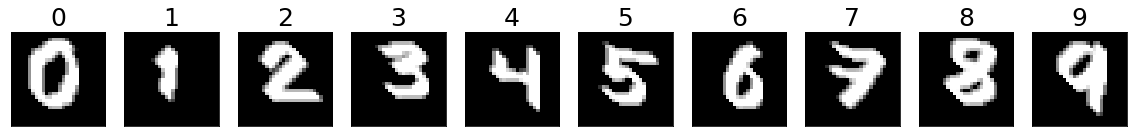

In [20]:
from PIL import Image
import numpy as np

pictures = torch.empty([10,1,28,28])

for i in range(10):
  image = Image.open(str(i)+".png")
  data = asarray(image)*1.0
  data = torch.from_numpy(data[:,:,0])/250
  pictures[i,0,:,:] = data

batchplot = plt.figure(figsize=(20, 5))
for i in torch.arange(10):
    sub = batchplot.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    aux = sub.imshow(torch.squeeze(pictures[i]), cmap='gray')
    sub.set_title(str(i.item()), fontsize=25)



In [21]:
out4 = model(pictures)
pred4 = out4.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

out5 = model2(pictures)
pred5 = out5.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

out6 = model3(pictures)
pred6 = out6.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

print("True","\t","NN_1","\t","NN_2","\t","NN_3","\t",)
for i in range(10):
  print(i,"\t",pred4[i].item(),"\t",pred5[i].item(),"\t",pred6[i].item())

True 	 NN_1 	 NN_2 	 NN_3 	
0 	 3 	 0 	 0
1 	 8 	 8 	 1
2 	 3 	 2 	 2
3 	 3 	 3 	 3
4 	 8 	 4 	 4
5 	 8 	 5 	 5
6 	 3 	 6 	 6
7 	 3 	 8 	 8
8 	 3 	 2 	 3
9 	 3 	 9 	 9


# Tensor flow Playground

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2&seed=0.60764&showTestData=false&discretize=true&percTrainData=10&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false&playButton_hide=false